In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read a data from url for polynomal regression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
data = pd.read_csv(url, header=None)
# assign column names
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# checking for null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

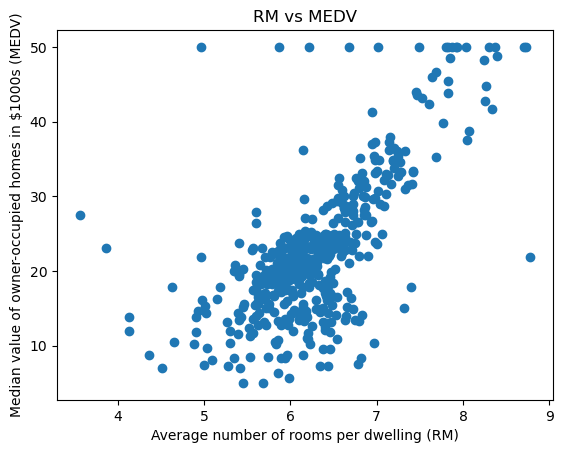

In [4]:
#assigning train and test data
from sklearn.model_selection import train_test_split
X = data[['RM']]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# explanation for why we are using RM and MEDV
# RM is the average number of rooms per dwelling
# MEDV is the median value of owner-occupied homes in $1000s
# we are trying to predict the median value of homes based on the number of rooms
# visualizing the data
plt.scatter(X, y)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.title('RM vs MEDV')
plt.show()

In [5]:
# lets 1st try linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
# evaluating linear regression
from sklearn.metrics import mean_squared_error, r2_score
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression MSE: {mse_lin}')
print(f'Linear Regression R2: {r2_lin}')

Linear Regression MSE: 46.14477534731727
Linear Regression R2: 0.3707569232254777


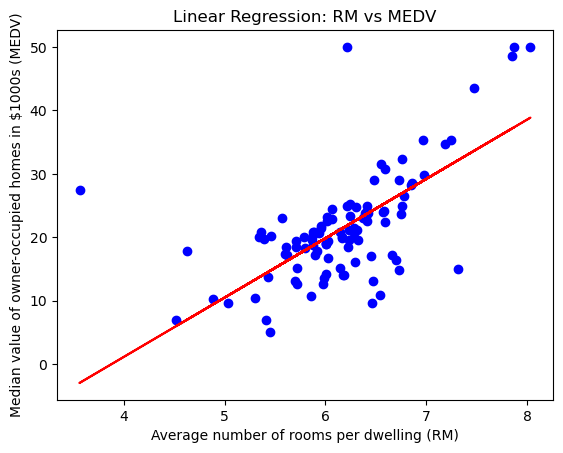

In [6]:
# graphing linear regression
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_lin, color='red')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.title('Linear Regression: RM vs MEDV')
plt.show()

In [7]:
# lets perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
# explaining degree
# degree=2 means we are using a quadratic polynomial
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
# evaluating polynomial regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}')
print(f'Polynomial Regression R2: {r2_poly}')

Polynomial Regression MSE: 35.36977373731791
Polynomial Regression R2: 0.5176878620868066


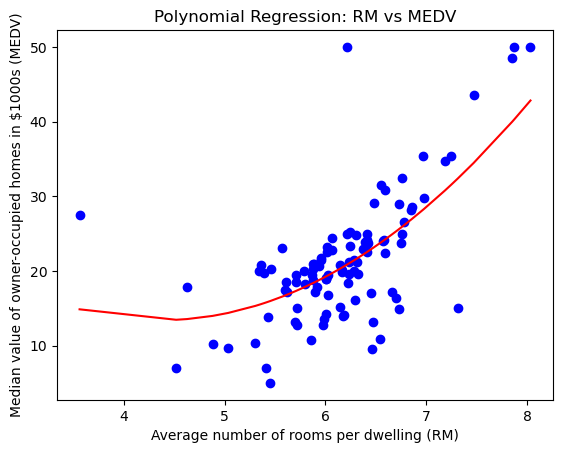

In [8]:
# graphing polynomial regression
# sorting the values for a better curve
sorted_zip = sorted(zip(X_test['RM'], y_pred_poly))
X_test_sorted, y_pred_poly_sorted = zip(*sorted_zip)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='red')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.title('Polynomial Regression: RM vs MEDV')
plt.show()

In [9]:
# explanation how to chose the degree of polynomial
# we can use cross-validation to choose the best degree
from sklearn.model_selection import cross_val_score
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    scores = cross_val_score(poly_reg, X_poly, y, scoring='neg_mean_squared_error', cv=5)
    print(f'Degree: {degree}, Cross-validated MSE: {-np.mean(scores)}')

Degree: 1, Cross-validated MSE: 52.71981195000429
Degree: 2, Cross-validated MSE: 42.86213625686974
Degree: 3, Cross-validated MSE: 42.465116782556585
Degree: 4, Cross-validated MSE: 45.93650401663997
Degree: 5, Cross-validated MSE: 42.301993597278454


In [10]:
# how many degrees are too many?
# as the degree increases, the model may overfit the training data
# we should choose the degree that minimizes the cross-validated MSE without overfitting
# in this case, we can see that degree 2 or 3 gives a good balance between bias and variance
# why not degree 4 or 5?
# because they may fit the noise in the training data rather than the underlying pattern
# thus, we should choose degree 2 or 3 for our polynomial regression model 